# Fumadores en 2008

/var/folders/00/2vhdfv2n2v148zj7xw55yghh0000gn/T/ipykernel_4179/2095736252.py:5: DtypeWarning: Columns (6,9,10,11,20,23,1139,1140,1141) have mixed types. Specify dtype option on import or set low_memory=False.
  fumadores_2008 = pd.read_csv("ENA2008.csv",delimiter=',',header='infer')


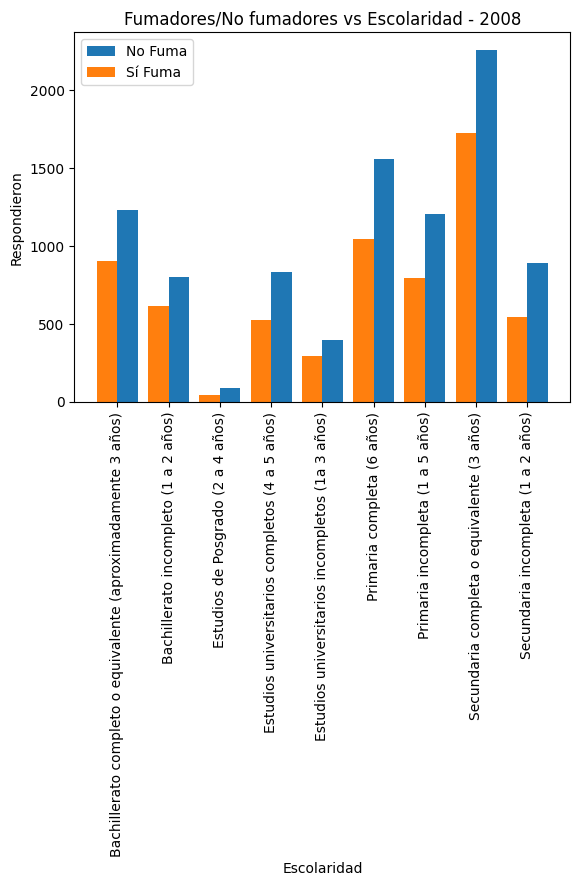

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fumadores_2008 = pd.read_csv("ENA2008.csv",delimiter=',',header='infer')

''' 
a036a = ¿Con qué frecuencia está fumando actualmente?
        1	Todos los días
	    2	Algunos días
	    3	No fumo actualmente

a008a = Escolaridad
        1	Primaria incompleta (1 a 5 años)
        2	Primaria completa (6 años)
        3	Secundaria incompleta (1 a 2 años)
        4	Secundaria completa o equivalente (3 años)
        5	Bachillerato incompleto (1 a 2 años)
        6	Bachillerato completo o equivalente (aproximadamente 3 años)
        7	Estudios universitarios incompletos (1a 3 años)
        8	Estudios universitarios completos (4 a 5 años)
        9	Estudios de Posgrado (2 a 4 años)
        99	No responde
'''

f_vs_nf_list = []
for encuestado in fumadores_2008['a036a']:
    try:
        int(encuestado)
        if int(encuestado) < 3:
            f_vs_nf_list.append("Sí")
        else:
            f_vs_nf_list.append("No")
    except:
        f_vs_nf_list.append("N/A")

df_fumadores_2008 = pd.DataFrame({"Fuma 2008":f_vs_nf_list})
df_fumadores_2008.drop(df_fumadores_2008[df_fumadores_2008['Fuma 2008'] == 'N/A'].index, inplace=True)
fumadores_2008.drop(fumadores_2008[fumadores_2008['a036a'] == " "].index, inplace=True)
fumadores_2008.drop(fumadores_2008[fumadores_2008['a008a'] == " "].index, inplace=True)

''' Algunas respuestas para el último grado de estudios están como texto y otras como entero
    por lo que hay que capturar ambos duplicando el texto a reemplazar'''
grados_desc = [
    "Primaria incompleta (1 a 5 años)",
    "Primaria incompleta (1 a 5 años)",
    "Primaria completa (6 años)",
    "Primaria completa (6 años)",
    "Secundaria incompleta (1 a 2 años)",
    "Secundaria incompleta (1 a 2 años)",
    "Secundaria completa o equivalente (3 años)",
    "Bachillerato incompleto (1 a 2 años)",
    "Bachillerato incompleto (1 a 2 años)",
    "Bachillerato completo o equivalente (aproximadamente 3 años)",
    "Estudios universitarios incompletos (1a 3 años)",
    "Estudios universitarios incompletos (1a 3 años)",
    "Estudios universitarios completos (4 a 5 años)",
    "Estudios universitarios completos (4 a 5 años)",
    "Estudios de Posgrado (2 a 4 años)",
    "No responde"
]
grados_num = [
    1,
    "1",
    2,
    "2",
    3,
    "3",
    "4",
    5,
    "5",
    "6",
    7,
    "7",
    8,
    "8",
    "9",
    "99"
]
fuma = pd.DataFrame({"Fuma":fumadores_2008['a036a']}).Fuma.replace(["1","2","3"],["Sí","Sí","No"])
escolaridad = pd.DataFrame({"Escolaridad":fumadores_2008['a008a']}).replace(grados_num,grados_desc).sort_values(by="Escolaridad",ascending=True)
escolaridad.drop(escolaridad[escolaridad['Escolaridad'] == "No responde"].index, inplace=True)

fuma_y_escolaridad = pd.concat([escolaridad,fuma],axis=1)
fuma_y_escolaridad.drop(fuma_y_escolaridad[fuma_y_escolaridad['Escolaridad'] == " "].index, inplace=True)
grado_fuma = fuma_y_escolaridad[fuma_y_escolaridad["Fuma"] == "Sí"]
grado_no_fuma = fuma_y_escolaridad[fuma_y_escolaridad["Fuma"] == "No"]
grado_fuma = grado_fuma.groupby(grado_fuma["Escolaridad"]).value_counts()
grado_no_fuma = grado_no_fuma.groupby(grado_no_fuma["Escolaridad"]).value_counts()

X = escolaridad.groupby(escolaridad["Escolaridad"]).indices
X_axis = np.arange(len(X))

plt.bar(X_axis + 0.2, grado_no_fuma, 0.4, label = 'No Fuma')
plt.bar(X_axis - 0.2, grado_fuma, 0.4, label = 'Sí Fuma')

plt.xticks(X_axis, X, rotation = 90)
plt.ylabel("Respondieron")
plt.xlabel("Escolaridad")
plt.title("Fumadores/No fumadores vs Escolaridad - 2008")
plt.legend()
plt.show()


In [45]:
print("Total encuestados:",len(f_vs_nf_list),"Total que contestaron:",len(df_fumadores_2008))
df_fumadores_totales_2008 = df_fumadores_2008.groupby(df_fumadores_2008["Fuma 2008"])["Fuma 2008"].count()
porcentajes = pd.Series(df_fumadores_totales_2008 / len(df_fumadores_2008) * 100)
totales = pd.concat([df_fumadores_totales_2008,porcentajes.rename("%")],axis=1)
totales

Total encuestados: 51227 Total que contestaron: 16358


,Fuma 2008,%
Fuma 2008,,
No,9640,58.93141
Sí,6718,41.06859


# Fumadores en 2012

/var/folders/00/2vhdfv2n2v148zj7xw55yghh0000gn/T/ipykernel_4179/4105686712.py:26: DtypeWarning: Columns (284,288,292,296,300,304,308) have mixed types. Specify dtype option on import or set low_memory=False.
  fumadores_2012 = pd.read_csv("tbl_individual_seleccionados_2012-01-30.csv",delimiter=',',header='infer')


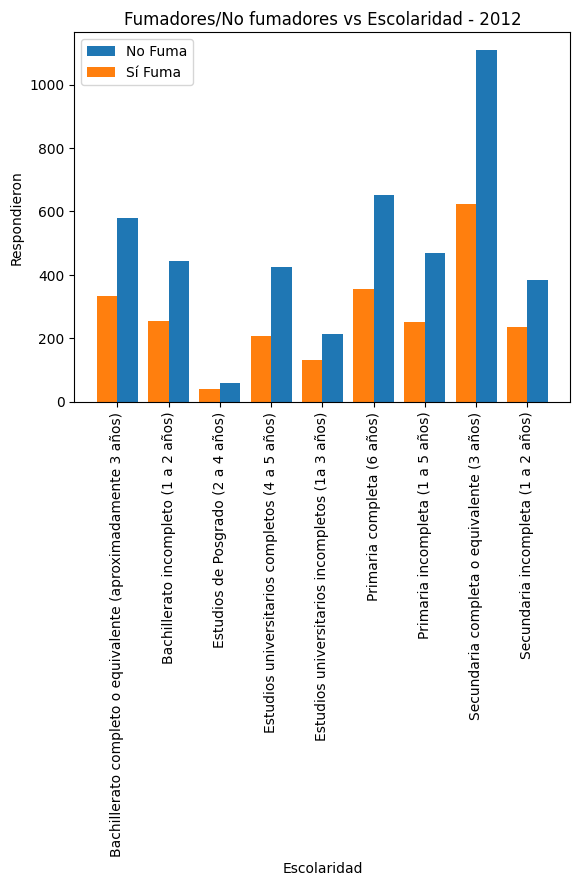

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

''' 
a032 = ¿Con qué frecuencia está fumando actualmente? 

    	1	Todos los días
	    2	Algunos días
	    3	No fuma actualmente

a008a = ¿Cuál fue el último grado que completó en la escuela o cuál es el último grado que ha completado hasta ahora?

    1	Primaria incompleta (1 a 5 años)
    2	Primaria completa (6 años)
    3	Secundaria incompleta (1 a 2 años)
    4	Secundaria completa o equivalente (3 años)
    5	Bachillerato incompleto (1 a 2 años)
    6	Bachillerato completo o equivalente (aproximadamente 3 años)
    7	Estudios universitarios incompletos (1 a 3 años)
    8	Estudios universitarios completos (4 a 5 años)
    9	Estudios de Posgrado (2 a 4 años)
    99	No responde
'''

fumadores_2012 = pd.read_csv("tbl_individual_seleccionados_2012-01-30.csv",delimiter=',',header='infer')

f_vs_nf_list = []
for encuestado in fumadores_2012['a032']:
    try:
        int(encuestado)
        if int(encuestado) < 3:
            f_vs_nf_list.append("Sí")
        else:
            f_vs_nf_list.append("No")
    except:
        f_vs_nf_list.append("N/A")

df_fumadores_2012 = pd.DataFrame({"Fuma 2012":f_vs_nf_list})
df_fumadores_2012.drop(df_fumadores_2012[df_fumadores_2012['Fuma 2012'] == 'N/A'].index, inplace=True)
fumadores_2012.drop(fumadores_2012[fumadores_2012['a032'] == " "].index, inplace=True)
fumadores_2012.drop(fumadores_2012[fumadores_2012['a008a'] == " "].index, inplace=True)

''' Algunas respuestas para el último grado de estudios están como texto y otras como entero
    por lo que hay que capturar ambos duplicando el texto a reemplazar'''
grados_desc = [
    "Primaria incompleta (1 a 5 años)",
    "Primaria completa (6 años)",
    "Secundaria incompleta (1 a 2 años)",
    "Secundaria completa o equivalente (3 años)",
    "Bachillerato incompleto (1 a 2 años)",
    "Bachillerato completo o equivalente (aproximadamente 3 años)",
    "Estudios universitarios incompletos (1a 3 años)",
    "Estudios universitarios completos (4 a 5 años)",
    "Estudios de Posgrado (2 a 4 años)",
    "No responde"
]
grados_num = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "99"
]
fuma = pd.DataFrame({"Fuma":fumadores_2012['a032']}).Fuma.replace(["1","2","3"],["Sí","Sí","No"])
escolaridad = pd.DataFrame({"Escolaridad":fumadores_2012['a008a']}).replace(grados_num,grados_desc)
escolaridad.drop(escolaridad[escolaridad['Escolaridad'] == "No responde"].index, inplace=True)

fuma_y_escolaridad = pd.concat([escolaridad,fuma],axis=1)
fuma_y_escolaridad.drop(fuma_y_escolaridad[fuma_y_escolaridad['Escolaridad'] == " "].index, inplace=True)
grado_fuma = fuma_y_escolaridad[fuma_y_escolaridad["Fuma"] == "Sí"]
grado_no_fuma = fuma_y_escolaridad[fuma_y_escolaridad["Fuma"] == "No"]
grado_fuma = grado_fuma.groupby(grado_fuma["Escolaridad"]).value_counts()
grado_no_fuma = grado_no_fuma.groupby(grado_no_fuma["Escolaridad"]).value_counts()

X = escolaridad.groupby(escolaridad["Escolaridad"]).indices
X_axis = np.arange(len(X))

plt.bar(X_axis + 0.2, grado_no_fuma, 0.4, label = 'No Fuma')
plt.bar(X_axis - 0.2, grado_fuma, 0.4, label = 'Sí Fuma')

plt.xticks(X_axis, X, rotation = 90)
plt.ylabel("Respondieron")
plt.xlabel("Escolaridad")
plt.title("Fumadores/No fumadores vs Escolaridad - 2012")
plt.legend()
plt.show()


In [191]:
print("Total encuestados:",len(f_vs_nf_list),"Total que contestaron:",len(df_fumadores_2012))
df_fumadores_totales_2012 = df_fumadores_2012.groupby(df_fumadores_2012["Fuma 2012"])["Fuma 2012"].count()
porcentajes = pd.Series(df_fumadores_totales_2012 / len(df_fumadores_2012) * 100)
totales = pd.concat([df_fumadores_totales_2012,porcentajes.rename("%")],axis=1)
totales

Total encuestados: 16249 Total que contestaron: 6902


,Fuma 2012,%
Fuma 2012,,
No,4427,64.140829
Sí,2475,35.859171


# Fumadores 2016-2017

/var/folders/00/2vhdfv2n2v148zj7xw55yghh0000gn/T/ipykernel_4179/2951160181.py:25: DtypeWarning: Columns (19,168,1514) have mixed types. Specify dtype option on import or set low_memory=False.
  fumadores_2016 = pd.read_csv("ENCODAT_2016_2017_Individual/ENCODAT_2016_2017_Individual.csv",delimiter=',',header='infer')


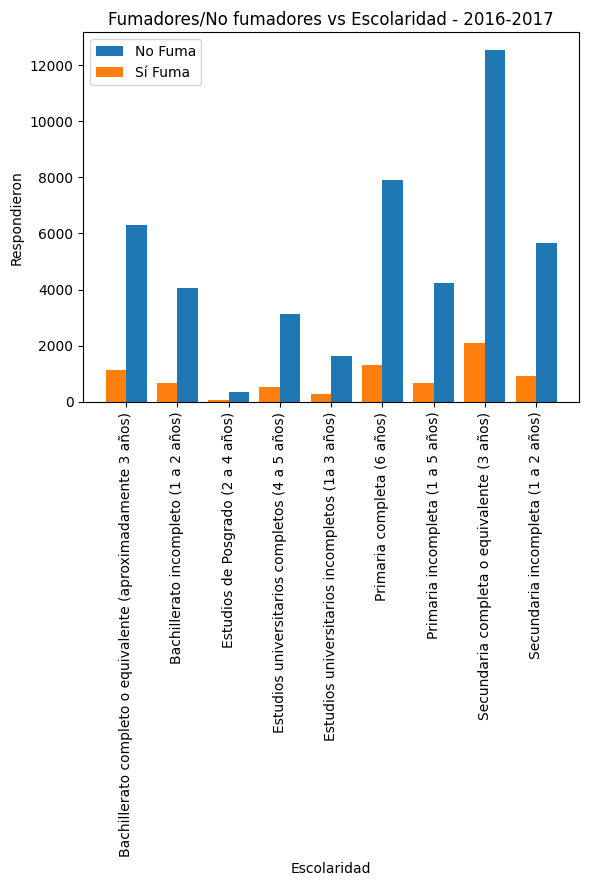

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

''' tb02 ¿Actualmente fuma tabaco todos los días, algunos días o no fuma actualmente?

tb02	1	Todos los días
	    2	Algunos días
	    3	No fuma actualmente
	    7	No sabe
	    9	No responde

ds9  ¿Cuál fue el último grado que ha completado o completó en la escuela?
1	Primaria incompleta (1 a 5 años)
2	Primaria completa (6 años)
3	Secundaria incompleta (1 a 2 años)
4	Secundaria completa o equivalente (3 años)
5	Bachillerato incompleto (1 a 2 años)
6	Bachillerato completo o equivalente (aprox. 3 años)
7	Estudios Universitarios incompletos (1 a 3 años)
8	Estudios  Universitarios completos (4 a 5 años)
9	Estudios de Posgrado (2 a 4 años)
99	No contesta
'''
fumadores_2016 = pd.read_csv("ENCODAT_2016_2017_Individual/ENCODAT_2016_2017_Individual.csv",delimiter=',',header='infer')

f_vs_nf_list = []
for encuestado in fumadores_2016['tb02']:
    try:
        int(encuestado)
        if int(encuestado) < 3:
            f_vs_nf_list.append("Sí")
        elif int(encuestado) == 3:
            f_vs_nf_list.append("No")
        elif int(encuestado) > 3:
            f_vs_nf_list.append("N/A")
    except:
        f_vs_nf_list.append("N/A")

df_fumadores_2016 = pd.DataFrame({"Fuma 2016-2017":f_vs_nf_list})

df_fumadores_2016.drop(df_fumadores_2016[df_fumadores_2016['Fuma 2016-2017'] == 'N/A'].index, inplace=True)
fumadores_2016.drop(fumadores_2016[fumadores_2016['tb02'] == " "].index, inplace=True)
fumadores_2016.drop(fumadores_2016[fumadores_2016['ds9'] == " "].index, inplace=True)

''' Algunas respuestas para el último grado de estudios están como texto y otras como entero
    por lo que hay que capturar ambos duplicando el texto a reemplazar'''
grados_desc = [
    "Primaria incompleta (1 a 5 años)",
    "Primaria incompleta (1 a 5 años)",
    "Primaria completa (6 años)",
    "Primaria completa (6 años)",
    "Secundaria incompleta (1 a 2 años)",
    "Secundaria incompleta (1 a 2 años)",
    "Secundaria completa o equivalente (3 años)",
    "Secundaria completa o equivalente (3 años)",
    "Bachillerato incompleto (1 a 2 años)",
    "Bachillerato incompleto (1 a 2 años)",
    "Bachillerato completo o equivalente (aproximadamente 3 años)",
    "Bachillerato completo o equivalente (aproximadamente 3 años)",
    "Estudios universitarios incompletos (1a 3 años)",
    "Estudios universitarios incompletos (1a 3 años)",
    "Estudios universitarios completos (4 a 5 años)",
    "Estudios universitarios completos (4 a 5 años)",
    "Estudios de Posgrado (2 a 4 años)",
    "Estudios de Posgrado (2 a 4 años)",
    "No responde"
]
grados_num = [
    "1",
    1,
    "2",
    2,
    "3",
    3,
    "4",
    4,
    "5",
    5,
    "6",
    6,
    "7",
    7,
    "8",
    8,
    "9",
    9,
    "99"
]
fuma = pd.DataFrame({"Fuma":fumadores_2016['tb02']}).reset_index().Fuma.replace([1,2,3,7,9],["Sí","Sí","No","N/A","N/A"])
escolaridad = pd.DataFrame({"Escolaridad":fumadores_2016['ds9']}).replace(grados_num,grados_desc)
escolaridad.drop(escolaridad[escolaridad['Escolaridad'] == "No responde"].index, inplace=True)
fuma_y_escolaridad = pd.concat([escolaridad,fuma],axis=1)
fuma_y_escolaridad.drop(fuma_y_escolaridad[fuma_y_escolaridad['Escolaridad'] == " "].index, inplace=True)
grado_fuma = fuma_y_escolaridad[fuma_y_escolaridad["Fuma"] == "Sí"]
grado_no_fuma = fuma_y_escolaridad[fuma_y_escolaridad["Fuma"] == "No"]
grado_fuma = grado_fuma.groupby(grado_fuma["Escolaridad"]).value_counts()
grado_no_fuma = grado_no_fuma.groupby(grado_no_fuma["Escolaridad"]).value_counts()

X = escolaridad.groupby(escolaridad["Escolaridad"]).count().index
X_axis = np.arange(len(X))

plt.bar(X_axis + 0.2, grado_no_fuma, 0.4, label = 'No Fuma')
plt.bar(X_axis - 0.2, grado_fuma, 0.4, label = 'Sí Fuma')

plt.xticks(X_axis, X, rotation = 90)
plt.ylabel("Respondieron")
plt.xlabel("Escolaridad")
plt.title("Fumadores/No fumadores vs Escolaridad - 2016-2017")
plt.legend()
plt.show()


In [194]:
print("Total encuestados:",len(f_vs_nf_list),"Total que contestaron:",len(df_fumadores_2016))
df_fumadores_totales_2016 = df_fumadores_2016.groupby(df_fumadores_2016["Fuma 2016-2017"])["Fuma 2016-2017"].count()
porcentajes = pd.Series(df_fumadores_totales_2016 / len(df_fumadores_2016) * 100)
totales = pd.concat([df_fumadores_totales_2016,porcentajes.rename("%")],axis=1)
totales

Total encuestados: 56877 Total que contestaron: 56463


,Fuma 2016-2017,%
Fuma 2016-2017,,
No,48490,85.879248
Sí,7973,14.120752
